In [1]:
!pip install surprise

     ---------------------------------------- 0.0/772.0 kB ? eta -:--:--
     --------------------- ---------------- 430.1/772.0 kB 8.9 MB/s eta 0:00:01
     -------------------------------------- 772.0/772.0 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-win_amd64.whl size=1083722 sha256=1cd014475262d829eaf666c39437850f75eb84d6afcda1550bbe6aa29ac968f3
  Stored in directory: c:\users\tengwei\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local\pip\cache\wheels\a5\ca\a8\4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
import pandas as pd
import numpy as np
from surprise import Reader, Dataset, SVD
df=pd.read_csv('ratings_small.csv')
df.head()


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [3]:
df.shape

(100004, 4)

In [4]:
from surprise.accuracy import rmse
from surprise.model_selection import train_test_split
reader = Reader()
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)
train, test = train_test_split(data, test_size=0.25, random_state=1)

Trying different number of factors to see if this parameter affects the performance of the model.  
The default number of factors is 100, hence we will tweak the number of factors from 1-100 to evaluate the performance.

In [6]:
import time
from collections import defaultdict

# A dictionary to store the rsme, fit time and prediction time 
svd_dict = defaultdict(dict)
for i in range(100):
    svd = SVD(n_factors=i+1)
    start_time = time.time()
    svd.fit(train)
    fit_time = time.time() - start_time
    predictions = svd.test(test)
    svd_dict[i+1]['rmse'] = rmse(predictions)
    svd_dict[i+1]['fit_time'] = fit_time
    svd_dict[i+1]['prediction_time'] = time.time() - start_time - fit_time

# A dataframe to store the results
svd_df = pd.DataFrame(svd_dict)
svd_df

RMSE: 0.8959
RMSE: 0.8965
RMSE: 0.8965
RMSE: 0.8961
RMSE: 0.8973
RMSE: 0.8966
RMSE: 0.8985
RMSE: 0.8964
RMSE: 0.8976
RMSE: 0.8968
RMSE: 0.8970
RMSE: 0.8980
RMSE: 0.8971
RMSE: 0.8975
RMSE: 0.8984
RMSE: 0.8983
RMSE: 0.8989
RMSE: 0.8978
RMSE: 0.8972
RMSE: 0.8974
RMSE: 0.8980
RMSE: 0.8970
RMSE: 0.8965
RMSE: 0.8992
RMSE: 0.8996
RMSE: 0.8999
RMSE: 0.8981
RMSE: 0.8980
RMSE: 0.8988
RMSE: 0.8973
RMSE: 0.8987
RMSE: 0.8988
RMSE: 0.9002
RMSE: 0.9000
RMSE: 0.9007
RMSE: 0.8983
RMSE: 0.8997
RMSE: 0.8996
RMSE: 0.8992
RMSE: 0.9003
RMSE: 0.8978
RMSE: 0.8996
RMSE: 0.9012
RMSE: 0.9007
RMSE: 0.9003
RMSE: 0.9009
RMSE: 0.9002
RMSE: 0.8989
RMSE: 0.9008
RMSE: 0.9011
RMSE: 0.8994
RMSE: 0.9015
RMSE: 0.9012
RMSE: 0.9021
RMSE: 0.9016
RMSE: 0.9008
RMSE: 0.9005
RMSE: 0.8991
RMSE: 0.9011
RMSE: 0.9031
RMSE: 0.9009
RMSE: 0.9011
RMSE: 0.8996
RMSE: 0.9007
RMSE: 0.9035
RMSE: 0.9013
RMSE: 0.9010
RMSE: 0.9016
RMSE: 0.9052
RMSE: 0.9045
RMSE: 0.9028
RMSE: 0.9021
RMSE: 0.9030
RMSE: 0.9013
RMSE: 0.9001
RMSE: 0.9044
RMSE: 0.9036

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
rmse,0.895869,0.896512,0.896487,0.896118,0.897343,0.896614,0.898483,0.896353,0.897610,0.896788,...,0.904014,0.905048,0.902392,0.902422,0.904387,0.904568,0.903240,0.903639,0.903117,0.904597
fit_time,0.274139,0.273629,0.296696,0.268788,0.286133,0.289823,0.303881,0.289129,0.329952,0.367701,...,0.566176,0.531554,0.554495,0.616426,0.674337,0.617518,0.614329,0.579268,0.632405,0.648025
prediction_time,0.095340,0.135617,0.101469,0.145533,0.079487,0.127941,0.080531,0.120177,0.074232,0.149645,...,0.132315,0.100346,0.127882,0.115640,0.125562,0.102832,0.154335,0.120012,0.150265,0.082227


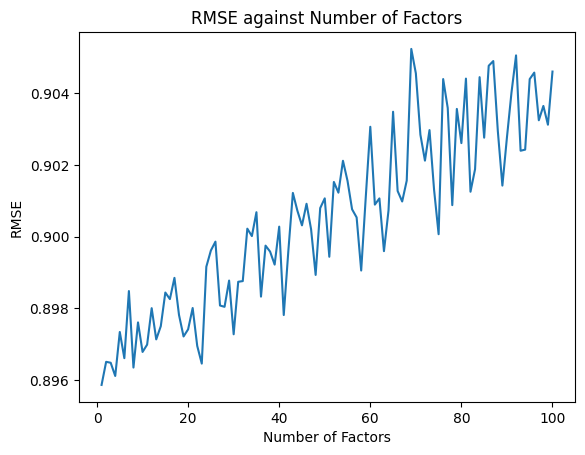

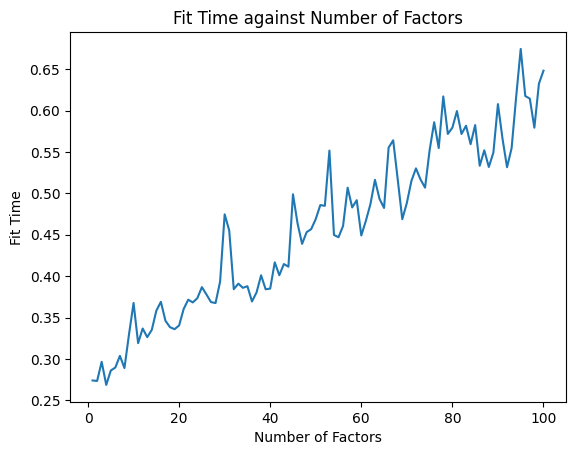

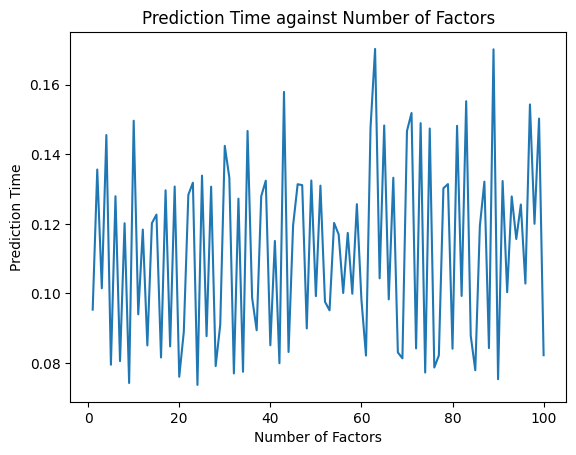

In [7]:
# Plot the RMSE, fit time and prediction time against the number of factors
import matplotlib.pyplot as plt
plt.plot(svd_df.loc['rmse'])
plt.xlabel('Number of Factors')
plt.ylabel('RMSE')
plt.title('RMSE against Number of Factors')
plt.show()

plt.plot(svd_df.loc['fit_time'])
plt.xlabel('Number of Factors')
plt.ylabel('Fit Time')
plt.title('Fit Time against Number of Factors')
plt.show()

plt.plot(svd_df.loc['prediction_time'])
plt.xlabel('Number of Factors')
plt.ylabel('Prediction Time')
plt.title('Prediction Time against Number of Factors')
plt.show()


We will be using the default parameters set in the SVD for our comparison between the different algorithms.

In [5]:
import time
svd = SVD()
begin_fit = time.time()
svd.fit(train)
end_fit = time.time()
begin_predict = time.time()
end_predict = time.time()
svd.test(test)
result = rmse(svd.test(test))
row = {"Algorithm":"SVD","Fit Time":end_fit-begin_fit,"Prediction Time":end_predict-begin_predict}
print(row)

RMSE: 0.9047
{'Algorithm': 'SVD', 'Fit Time': 0.7300827503204346, 'Prediction Time': 0.0}


In [6]:
testdf = pd.DataFrame(test)
testdf = testdf.rename(columns={
    0: "UserId",
    1: "MovieId",
    2: "Actual Rating"
})
testdf["Predicted Rating"] = -1
testdf["Error"] = -1
for index, row in testdf.iterrows():
  testdf.loc[index, 'Predicted Rating'] = svd.predict(row["UserId"], row["MovieId"], row["Actual Rating"]).est
for index, row in testdf.iterrows():
  testdf.loc[index, 'Error'] = '{:.2f}'.format(abs(row["Predicted Rating"] - row["Actual Rating"]))

testdf


,UserId,MovieId,Actual Rating,Predicted Rating,Error
0,387,3801,4.0,4.025665,0.03
1,534,507,4.0,3.728889,0.27
2,480,8874,5.0,4.382798,0.62
3,575,3469,4.0,3.690527,0.31
4,214,1219,4.0,4.286396,0.29
...,...,...,...,...,...
24996,367,2858,3.5,4.176137,0.68
24997,654,33794,4.5,4.319031,0.18
24998,30,903,4.0,4.209197,0.21
24999,537,1188,5.0,3.417047,1.58


In [7]:
worst_predictions = testdf.sort_values(by='Error',ascending=False)[:50]
best_predictions = testdf.sort_values(by='Error',ascending=False)[-50:]

best_predictions

,UserId,MovieId,Actual Rating,Predicted Rating,Error
7496,585,858,5.0,5.000000,0.00
11085,664,63082,4.0,4.004569,0.00
1285,496,2,4.0,4.003943,0.00
12686,291,318,5.0,5.000000,0.00
16882,671,4027,4.0,3.997664,0.00
19073,344,296,4.0,4.003221,0.00
19709,401,1221,5.0,5.000000,0.00
19707,544,858,5.0,5.000000,0.00
22651,15,35957,2.5,2.499590,0.00
13873,384,1805,3.0,3.001626,0.00
